In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
# Assuming the dataset is in a CSV file, replace 'path_to_your_dataset.csv' with the actual path
df = pd.read_csv('daily-website-visitors.csv')

# Display the first few rows of the dataframe
print(df.head())

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Check for missing values
print(df.isna().sum())

# Fill missing values if any
df.fillna(method='ffill', inplace=True)

# Display the summary of the dataframe
print(df.info())



   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  
Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 

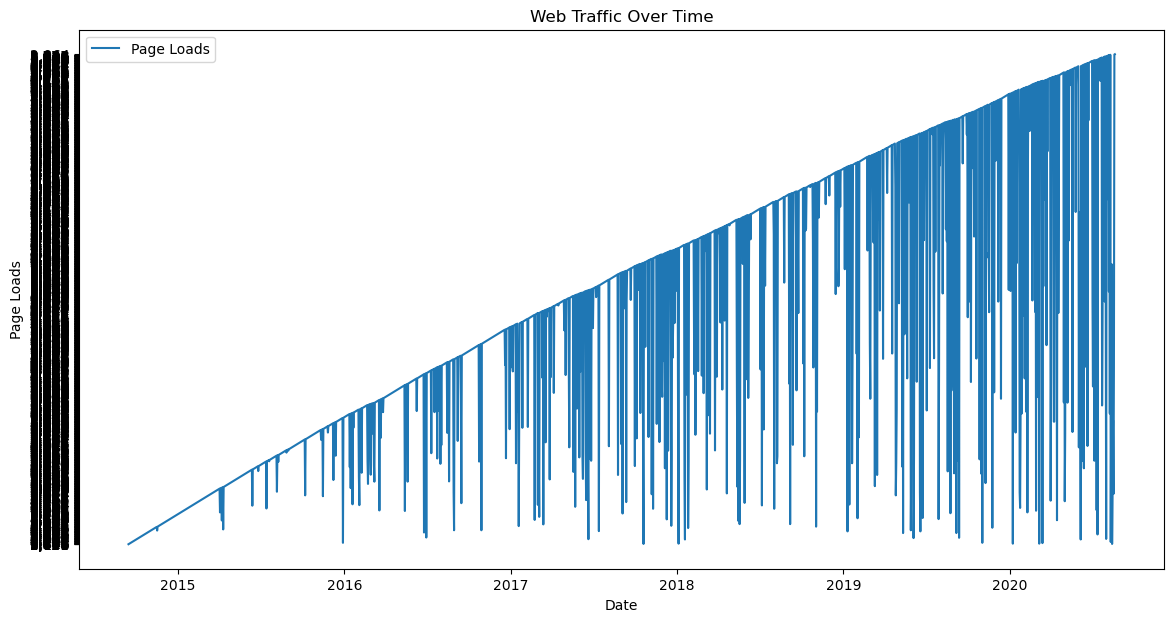

In [3]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Page.Loads'], label='Page Loads')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.title('Web Traffic Over Time')
plt.legend()
plt.show()


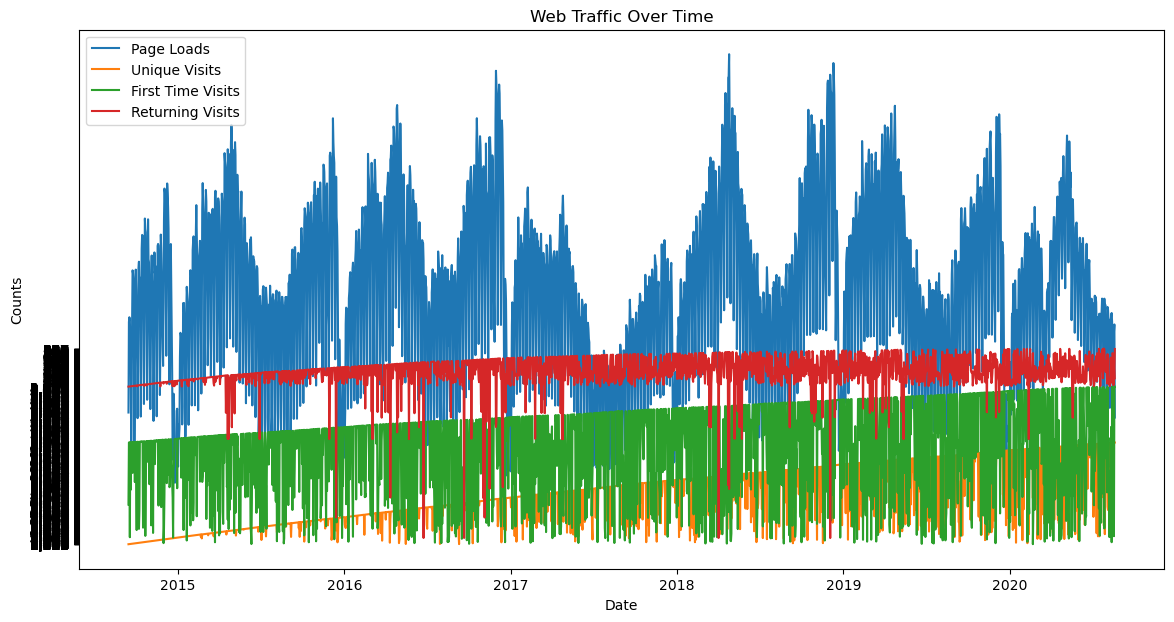

In [19]:
import matplotlib.pyplot as plt

# Plot the time series data for multiple metrics
plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Page.Loads'], label='Page Loads')
plt.plot(df.index, df['Unique.Visits'], label='Unique Visits')
plt.plot(df.index, df['First.Time.Visits'], label='First Time Visits')
plt.plot(df.index, df['Returning.Visits'], label='Returning Visits')

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Web Traffic Over Time')
plt.legend()
plt.show()


In [4]:

# Convert 'Page.Loads' column to numeric, removing commas
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(float)

# Use only the 'Page.Loads' column for forecasting
data = df[['Page.Loads']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Convert the time series data into sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 30  # e.g., use past 30 days to predict the next day

# Create sequences and labels
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and test sets
split_ratio = 0.8
split = int(len(X) * split_ratio)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Display the shapes of the training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Define the GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Create the LSTM and GRU models
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
gru_model = create_gru_model((X_train.shape[1], X_train.shape[2]))

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Train the GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


(1709, 30, 1) (1709, 1)
(428, 30, 1) (428, 1)

Epoch 1/50

43/43 [==============================] - 5s 39ms/step - loss: 0.0520 - val_loss: 0.0336
Epoch 2/50
43/43 [==============================] - 1s 21ms/step - loss: 0.0284 - val_loss: 0.0297
Epoch 3/50
43/43 [==============================] - 1s 27ms/step - loss: 0.0273 - val_loss: 0.0321
Epoch 4/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0281 - val_loss: 0.0296
Epoch 5/50
43/43 [==============================] - 1s 16ms/step - loss: 0.0271 - val_loss: 0.0322
Epoch 6/50
43/43 [==============================] - 1s 22ms/step - loss: 0.0266 - val_loss: 0.0313
Epoch 7/50
43/43 [==============================] - 1s 15ms/step - loss: 0.0267 - val_loss: 0.0286
Epoch 8/50
43/43 [==============================] - 1s 15ms/step - loss: 0.0266 - val_loss: 0.0271
Epoch 9/50
43/43 [==============================] - 1s 16ms/step - loss: 0.0242 - val_loss: 0.0243
Epoch 10/50
43/43 [==============================] - 1s 16ms/

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam

# Define input shape (assuming X_train shape is defined)
input_shape = X_train.shape[1:]

# Define LSTM model
lstm_input = Input(shape=input_shape)
lstm_layer = LSTM(50)(lstm_input)
lstm_dropout = Dropout(0.2)(lstm_layer)

# Define GRU model
gru_input = Input(shape=input_shape)
gru_layer = GRU(50)(gru_input)
gru_dropout = Dropout(0.2)(gru_layer)

# Concatenate LSTM and GRU outputs
concatenated = Concatenate()([lstm_dropout, gru_dropout])

# Dense layer for combined output
output = Dense(1)(concatenated)

# Define hybrid model
hybrid_model = Model(inputs=[lstm_input, gru_input], outputs=output)

# Compile model
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print model summary
hybrid_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 50)                   10400     ['input_3[0][0]']             
                                                                                                  
 gru_3 (GRU)                 (None, 50)                   7950      ['input_4[0][0]']             
                                                                                            

In [36]:
from sklearn.model_selection import train_test_split

# Split X_train and y_train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_val.shape, y_val.shape)


Training shapes: (1367, 30, 1) (1367, 1)
Validation shapes: (342, 30, 1) (342, 1)


In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam

# Define input shape (assuming X_train shape is defined)
input_shape = X_train.shape[1:]

# Define LSTM model
lstm_input = Input(shape=input_shape)
lstm_layer = LSTM(50)(lstm_input)
lstm_dropout = Dropout(0.2)(lstm_layer)

# Define GRU model
gru_input = Input(shape=input_shape)
gru_layer = GRU(50)(gru_input)
gru_dropout = Dropout(0.2)(gru_layer)

# Concatenate LSTM and GRU outputs
concatenated = Concatenate()([lstm_dropout, gru_dropout])

# Dense layer for combined output
output = Dense(1)(concatenated)

# Define hybrid model
hybrid_model = Model(inputs=[lstm_input, gru_input], outputs=output)

# Compile model
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print model summary
hybrid_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 30, 1)]              0         []                            
                                                                                                  
 lstm_4 (LSTM)               (None, 50)                   10400     ['input_5[0][0]']             
                                                                                                  
 gru_4 (GRU)                 (None, 50)                   7950      ['input_6[0][0]']             
                                                                                            

In [38]:
# Train the hybrid model
hybrid_history = hybrid_model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
43/43 [==============================] - 4s 22ms/step - loss: 0.0627 - val_loss: 0.0290
Epoch 2/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0302 - val_loss: 0.0271
Epoch 3/50
43/43 [==============================] - 1s 14ms/step - loss: 0.0286 - val_loss: 0.0250
Epoch 4/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0272 - val_loss: 0.0236
Epoch 5/50
43/43 [==============================] - 1s 12ms/step - loss: 0.0248 - val_loss: 0.0246
Epoch 6/50
43/43 [==============================] - 0s 11ms/step - loss: 0.0228 - val_loss: 0.0210
Epoch 7/50
43/43 [==============================] - 0s 9ms/step - loss: 0.0199 - val_loss: 0.0165
Epoch 8/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0148 - val_loss: 0.0079
Epoch 9/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0097 - val_loss: 0.0066
Epoch 10/50
43/43 [==============================] - 0s 10ms/step - loss: 0.0080 - val_loss: 0.0053
Epoch 11/5

In [44]:
from sklearn.model_selection import train_test_split

# Split X_train and y_train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_val.shape, y_val.shape)

# Train the hybrid model
hybrid_history = hybrid_model.fit([X_train, X_train], y_train,
                                  validation_data=([X_val, X_val], y_val),
                                  epochs=50, batch_size=32)


Training shapes: (1093, 30, 1) (1093, 1)
Validation shapes: (274, 30, 1) (274, 1)
Epoch 1/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 2/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 3/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 6/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 8/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 9/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 10/50
35/35 [=========

In [45]:
# Make predictions
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Combine predictions (e.g., by averaging)
combined_predictions = (lstm_predictions + gru_predictions) / 2

# Inverse transform the predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
combined_predictions = scaler.inverse_transform(combined_predictions)

# Inverse transform the test labels
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))


14/14 [==============================] - 0s 4ms/step


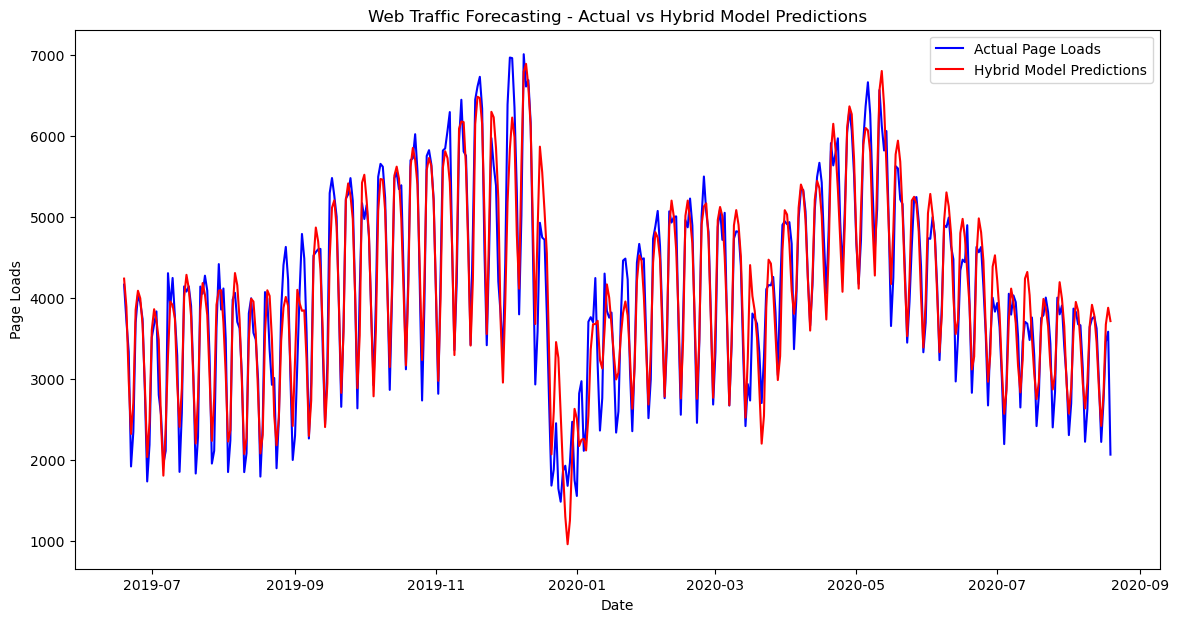

In [47]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df.index[split + sequence_length:], y_test_inverse, color='blue', label='Actual Page Loads')
plt.plot(df.index[split + sequence_length:], combined_predictions, color='red', label='Hybrid Model Predictions')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.title('Web Traffic Forecasting - Actual vs Hybrid Model Predictions')
plt.legend()
plt.show()


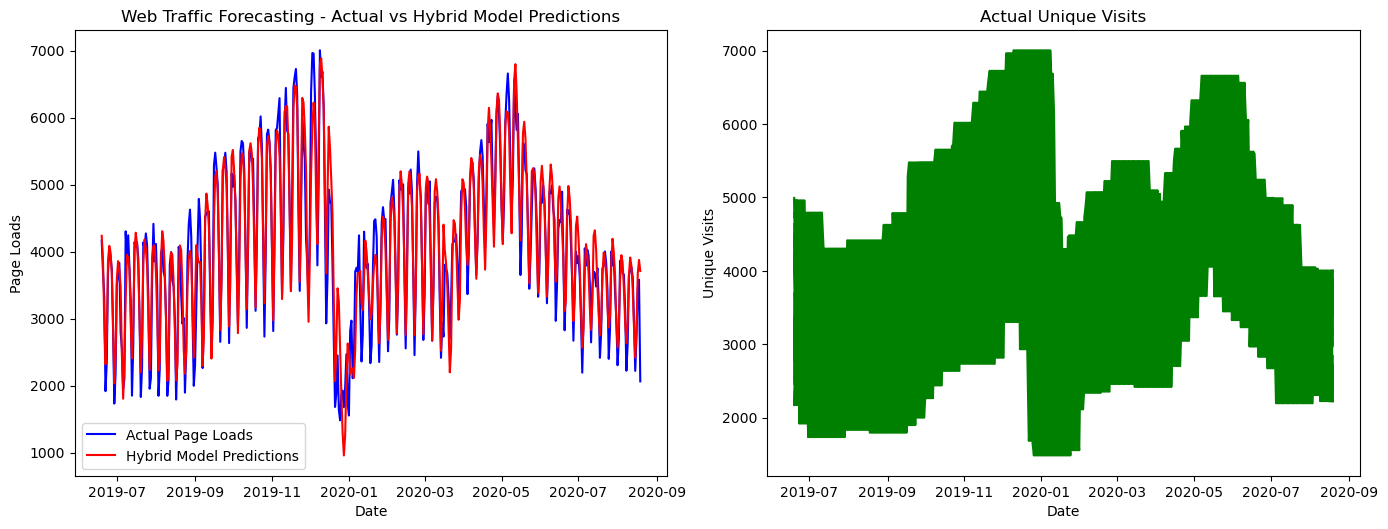

In [51]:
# Plotting with correct indexing based on actual features in X_test
plt.figure(figsize=(14, 10))

# Plot actual Page Loads
plt.subplot(2, 2, 1)
plt.plot(df.index[split + sequence_length:], y_test_inverse, color='blue', label='Actual Page Loads')
plt.plot(df.index[split + sequence_length:], combined_predictions, color='red', label='Hybrid Model Predictions')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.title('Web Traffic Forecasting - Actual vs Hybrid Model Predictions')
plt.legend()

# Check if X_test has multiple features and adjust indexing accordingly
if X_test.shape[2] > 0:
    # Plot Actual Unique Visits
    plt.subplot(2, 2, 2)
    plt.plot(df.index[split + sequence_length:], scaler.inverse_transform(X_test[:, :, 0]), color='green', label='Actual Unique Visits')
    plt.xlabel('Date')
    plt.ylabel('Unique Visits')
    plt.title('Actual Unique Visits')

    # Plot Actual First Time Visits if available
    if X_test.shape[2] > 1:
        plt.subplot(2, 2, 3)
        plt.plot(df.index[split + sequence_length:], scaler.inverse_transform(X_test[:, :, 1]), color='orange', label='Actual First Time Visits')
        plt.xlabel('Date')
        plt.ylabel('First Time Visits')
        plt.title('Actual First Time Visits')

    # Plot Actual Returning Visits if available
    if X_test.shape[2] > 2:
        plt.subplot(2, 2, 4)
        plt.plot(df.index[split + sequence_length:], scaler.inverse_transform(X_test[:, :, 2]), color='purple', label='Actual Returning Visits')
        plt.xlabel('Date')
        plt.ylabel('Returning Visits')
        plt.title('Actual Returning Visits')

# Adjust layout
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 32ms/step


C:\Users\Alveera Fatima\AppData\Local\Temp\ipykernel_25184\956077503.py:25: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, closed='right')


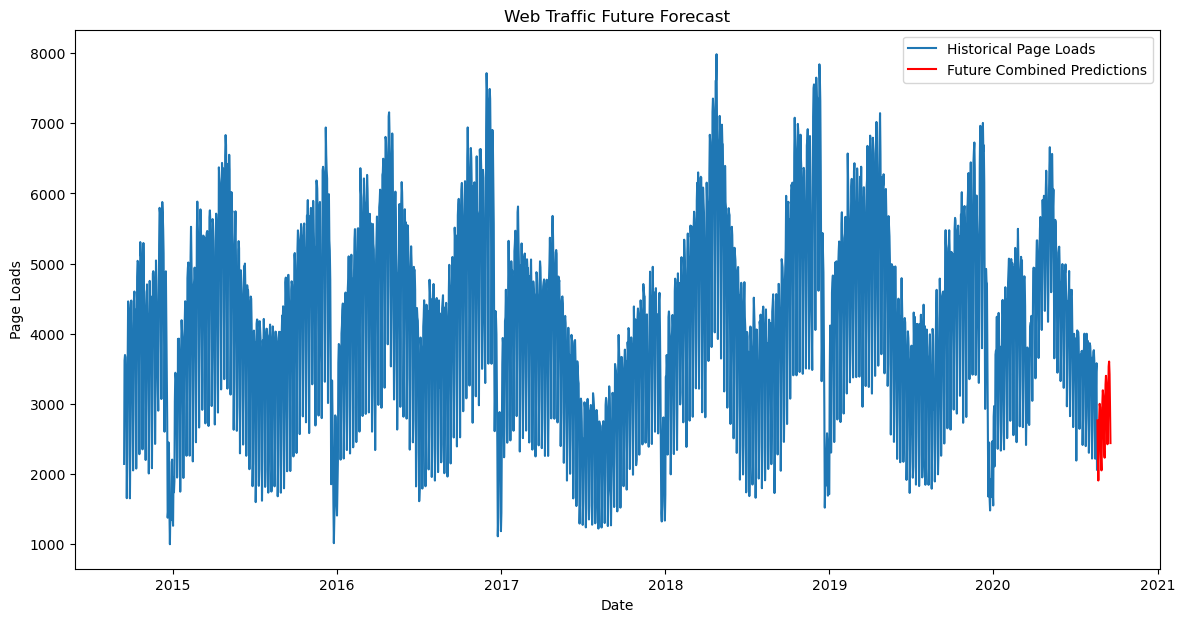

In [69]:
# Make future forecasts
def make_future_forecasts(model, data, steps, sequence_length):
    current_sequence = data[-sequence_length:]
    future_predictions = []
    for _ in range(steps):
        prediction = model.predict(current_sequence[np.newaxis, :, :])
        future_predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)
    return np.array(future_predictions)

# Number of days to forecast
future_steps = 30

# Make future forecasts using the combined model (LSTM + GRU)
lstm_future_predictions = make_future_forecasts(lstm_model, scaled_data, future_steps, sequence_length)
gru_future_predictions = make_future_forecasts(gru_model, scaled_data, future_steps, sequence_length)

# Combine future predictions
combined_future_predictions = (lstm_future_predictions + gru_future_predictions) / 2

# Inverse transform the future predictions
combined_future_predictions = scaler.inverse_transform(combined_future_predictions.reshape(-1, 1))

# Create a date range for the future predictions
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, closed='right')

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Page.Loads'], label='Historical Page Loads')
plt.plot(future_dates, combined_future_predictions, color='red', label='Future Combined Predictions')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.title('Web Traffic Future Forecast')
plt.legend()
plt.show()


In [70]:
from sklearn.metrics import mean_squared_error
import math

# Make predictions on the test set using the hybrid model
hybrid_test_predictions = hybrid_model.predict([X_test, X_test])

# Inverse transform the test predictions
hybrid_test_predictions = scaler.inverse_transform(hybrid_test_predictions)

# Inverse transform the test labels
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for the hybrid model test predictions
rmse_hybrid = math.sqrt(mean_squared_error(y_test_inverse, hybrid_test_predictions))
mse_hybrid = mean_squared_error(y_test_inverse, hybrid_test_predictions)

print(f'RMSE for Hybrid Model Test Predictions: {rmse_hybrid}')
print(f'MSE for Hybrid Model Test Predictions: {mse_hybrid}')


14/14 [==============================] - 0s 4ms/step
RMSE for Hybrid Model Test Predictions: 348.4519387120841
MSE for Hybrid Model Test Predictions: 121418.75359221


In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate the LSTM model on the test set
lstm_test_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Loss (MSE): {lstm_test_loss}")

# Predict on the test set
lstm_test_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
lstm_test_predictions = scaler.inverse_transform(lstm_test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_test_predictions))
lstm_mse = mean_squared_error(y_test_actual, lstm_test_predictions)

print(f"LSTM Test RMSE: {lstm_rmse}")
print(f"LSTM Test MSE: {lstm_mse}")

# Evaluate the GRU model on the test set
gru_test_loss = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Loss (MSE): {gru_test_loss}")

# Predict on the test set
gru_test_predictions = gru_model.predict(X_test)

# Inverse transform the predictions and actual values
gru_test_predictions = scaler.inverse_transform(gru_test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for GRU model
gru_rmse = np.sqrt(mean_squared_error(y_test_actual, gru_test_predictions))
gru_mse = mean_squared_error(y_test_actual, gru_test_predictions)

print(f"GRU Test RMSE: {gru_rmse}")
print(f"GRU Test MSE: {gru_mse}")

# Combine predictions from LSTM and GRU models
combined_test_predictions = (lstm_test_predictions + gru_test_predictions) / 2

# Calculate RMSE and MSE for combined model
combined_rmse = np.sqrt(mean_squared_error(y_test_actual, combined_test_predictions))
combined_mse = mean_squared_error(y_test_actual, combined_test_predictions)

print(f"Combined Test RMSE: {combined_rmse}")
print(f"Combined Test MSE: {combined_mse}")


LSTM Test Loss (MSE): 0.005480822175741196
14/14 [==============================] - 0s 6ms/step
LSTM Test RMSE: 516.895430166896
LSTM Test MSE: 267180.8857274204
GRU Test Loss (MSE): 0.002776303794234991
14/14 [==============================] - 0s 7ms/step
GRU Test RMSE: 367.88606100927115
GRU Test MSE: 135340.15388491718
Combined Test RMSE: 422.09758484563815
Combined Test MSE: 178166.3711325207


In [71]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate the LSTM model on the test set
lstm_test_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Loss (MSE): {lstm_test_loss}")

# Predict on the test set with LSTM model
lstm_test_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
lstm_test_predictions = scaler.inverse_transform(lstm_test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_test_predictions))
lstm_mse = mean_squared_error(y_test_actual, lstm_test_predictions)

print(f"LSTM Test RMSE: {lstm_rmse}")
print(f"LSTM Test MSE: {lstm_mse}")

# Evaluate the GRU model on the test set
gru_test_loss = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Loss (MSE): {gru_test_loss}")

# Predict on the test set with GRU model
gru_test_predictions = gru_model.predict(X_test)

# Inverse transform the predictions and actual values
gru_test_predictions = scaler.inverse_transform(gru_test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for GRU model
gru_rmse = np.sqrt(mean_squared_error(y_test_actual, gru_test_predictions))
gru_mse = mean_squared_error(y_test_actual, gru_test_predictions)

print(f"GRU Test RMSE: {gru_rmse}")
print(f"GRU Test MSE: {gru_mse}")

# Combine predictions from LSTM and GRU models
combined_test_predictions = (lstm_test_predictions + gru_test_predictions) / 2

# Calculate RMSE and MSE for combined model
combined_rmse = np.sqrt(mean_squared_error(y_test_actual, combined_test_predictions))
combined_mse = mean_squared_error(y_test_actual, combined_test_predictions)

print(f"Combined Test RMSE: {combined_rmse}")
print(f"Combined Test MSE: {combined_mse}")

# Evaluate the hybrid model on the test set
hybrid_test_loss = hybrid_model.evaluate([X_test, X_test], y_test, verbose=0)
print(f"Hybrid Model Test Loss (MSE): {hybrid_test_loss}")

# Predict on the test set with hybrid model
hybrid_test_predictions = hybrid_model.predict([X_test, X_test])

# Inverse transform the predictions and actual values
hybrid_test_predictions = scaler.inverse_transform(hybrid_test_predictions)

# Calculate RMSE and MSE for hybrid model
hybrid_rmse = np.sqrt(mean_squared_error(y_test_actual, hybrid_test_predictions))
hybrid_mse = mean_squared_error(y_test_actual, hybrid_test_predictions)

print(f"Hybrid Model Test RMSE: {hybrid_rmse}")
print(f"Hybrid Model Test MSE: {hybrid_mse}")


LSTM Test Loss (MSE): 0.004686250351369381
14/14 [==============================] - 0s 4ms/step
LSTM Test RMSE: 477.96113603140765
LSTM Test MSE: 228446.84755643376
GRU Test Loss (MSE): 0.0028938408941030502
14/14 [==============================] - 0s 6ms/step
GRU Test RMSE: 375.5927263536399
GRU Test MSE: 141069.8960897602
Combined Test RMSE: 393.24215881733073
Combined Test MSE: 154639.39547131475
Hybrid Model Test Loss (MSE): 0.002490726765245199
14/14 [==============================] - 0s 3ms/step
Hybrid Model Test RMSE: 348.4519387120841
Hybrid Model Test MSE: 121418.75359221


14/14 [==============================] - 0s 5ms/step - loss: 0.0055
LSTM Model Loss: 0.005480822175741196
14/14 [==============================] - 0s 8ms/step - loss: 0.0028
GRU Model Loss: 0.002776303794234991


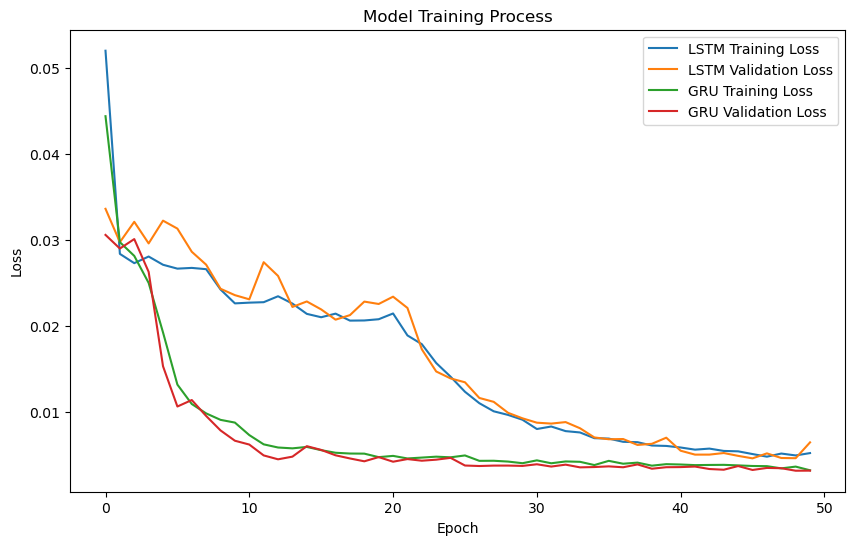

In [10]:
# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print("LSTM Model Loss:", lstm_loss)

# Evaluate the GRU model
gru_loss = gru_model.evaluate(X_test, y_test)
print("GRU Model Loss:", gru_loss)

# Visualize the training process (loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.title('Model Training Process')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 [==============================] - 0s 4ms/step - loss: 0.0047
LSTM Model Loss: 0.004686250351369381
14/14 [==============================] - 0s 6ms/step - loss: 0.0029
GRU Model Loss: 0.0028938408941030502
14/14 [==============================] - 0s 4ms/step - loss: 0.0025
Hybrid Model Loss: 0.002490726765245199


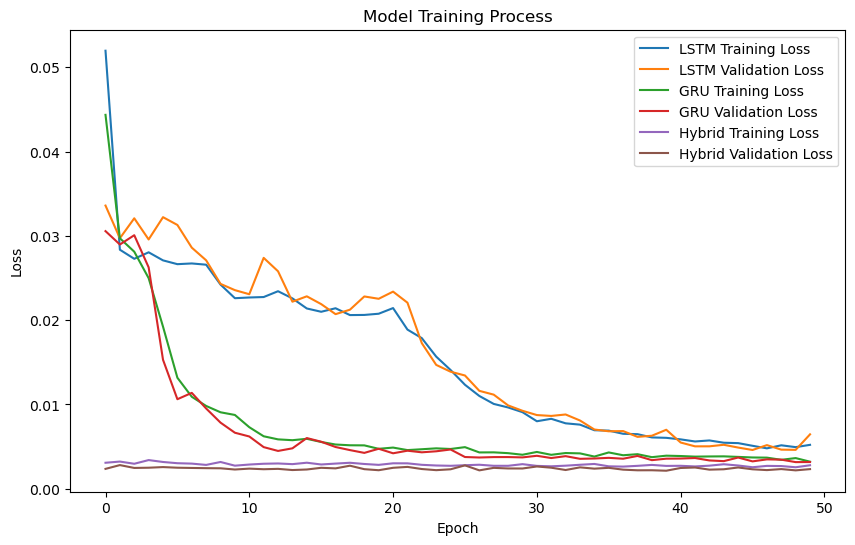

In [72]:
# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print("LSTM Model Loss:", lstm_loss)

# Evaluate the GRU model
gru_loss = gru_model.evaluate(X_test, y_test)
print("GRU Model Loss:", gru_loss)

# Evaluate the hybrid model
hybrid_loss = hybrid_model.evaluate([X_test, X_test], y_test)
print("Hybrid Model Loss:", hybrid_loss)

# Visualize the training process (loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.plot(hybrid_history.history['loss'], label='Hybrid Training Loss')
plt.plot(hybrid_history.history['val_loss'], label='Hybrid Validation Loss')
plt.title('Model Training Process')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 [==============================] - 0s 4ms/step
LSTM Test RMSE: 477.96113603140765
LSTM Test MSE: 228446.84755643376
GRU Test RMSE: 375.5927263536399
GRU Test MSE: 141069.8960897602
Hybrid Test RMSE: 348.4519387120841
Hybrid Test MSE: 121418.75359221


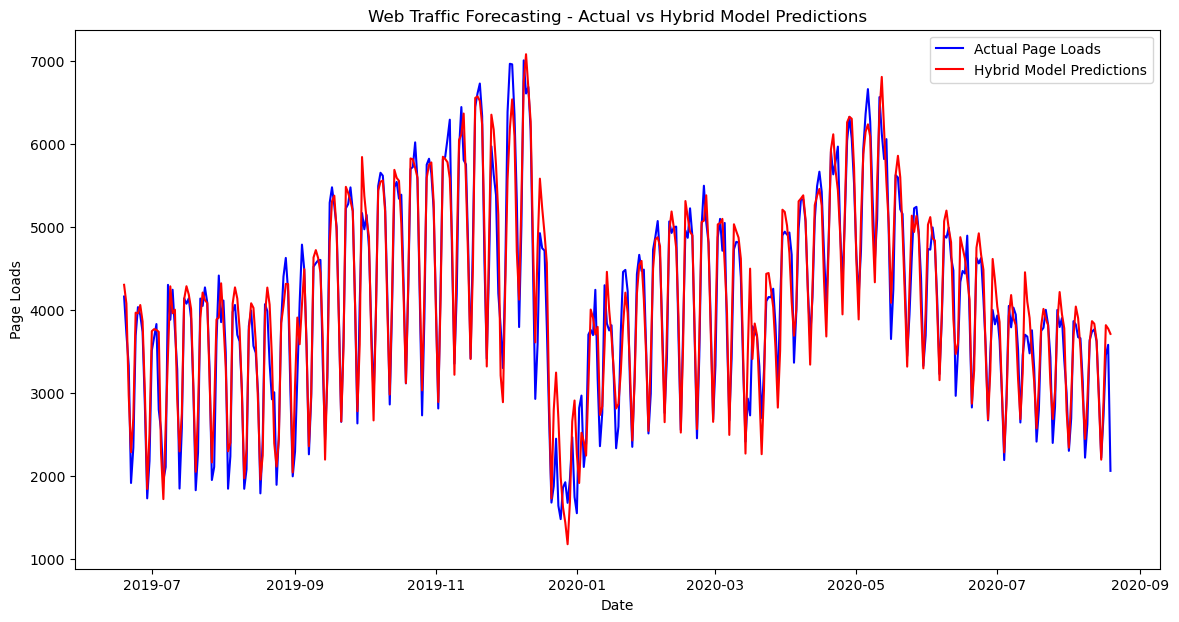

1/1 [==============================] - 0s 25ms/step


C:\Users\Alveera Fatima\AppData\Local\Temp\ipykernel_25184\2730177868.py:64: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, closed='right')


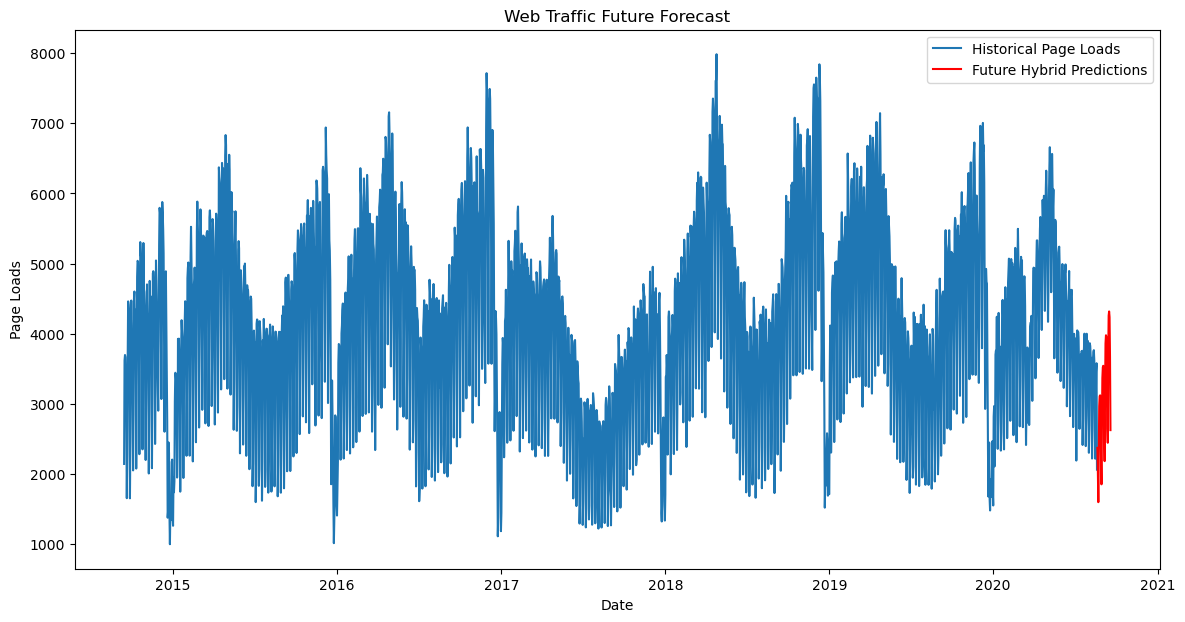

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate predictions for the test set
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
hybrid_predictions = hybrid_model.predict([X_test, X_test])

# Inverse transform the predictions and actual values
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
hybrid_predictions = scaler.inverse_transform(hybrid_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)

# Calculate RMSE and MSE for GRU model
gru_rmse = np.sqrt(mean_squared_error(y_test_actual, gru_predictions))
gru_mse = mean_squared_error(y_test_actual, gru_predictions)

# Calculate RMSE and MSE for hybrid model
hybrid_rmse = np.sqrt(mean_squared_error(y_test_actual, hybrid_predictions))
hybrid_mse = mean_squared_error(y_test_actual, hybrid_predictions)

print(f"LSTM Test RMSE: {lstm_rmse}")
print(f"LSTM Test MSE: {lstm_mse}")
print(f"GRU Test RMSE: {gru_rmse}")
print(f"GRU Test MSE: {gru_mse}")
print(f"Hybrid Test RMSE: {hybrid_rmse}")
print(f"Hybrid Test MSE: {hybrid_mse}")

# Plot the actual vs predicted values for the hybrid model
plt.figure(figsize=(14, 7))
plt.plot(df.index[split + sequence_length:], y_test_actual, color='blue', label='Actual Page Loads')
plt.plot(df.index[split + sequence_length:], hybrid_predictions, color='red', label='Hybrid Model Predictions')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.title('Web Traffic Forecasting - Actual vs Hybrid Model Predictions')
plt.legend()
plt.show()

# Plot the future predictions for the hybrid model
def make_future_forecasts(model, data, steps, sequence_length):
    current_sequence = data[-sequence_length:]
    future_predictions = []
    for _ in range(steps):
        prediction = model.predict([current_sequence[np.newaxis, :, :], current_sequence[np.newaxis, :, :]])
        future_predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)
    return np.array(future_predictions)

# Number of days to forecast
future_steps = 30

# Make future forecasts using the hybrid model
hybrid_future_predictions = make_future_forecasts(hybrid_model, scaled_data, future_steps, sequence_length)

# Inverse transform the future predictions
hybrid_future_predictions = scaler.inverse_transform(hybrid_future_predictions.reshape(-1, 1))

# Create a date range for the future predictions
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, closed='right')

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Page.Loads'], label='Historical Page Loads')
plt.plot(future_dates, hybrid_future_predictions, color='red', label='Future Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.title('Web Traffic Future Forecast')
plt.legend()
plt.show()


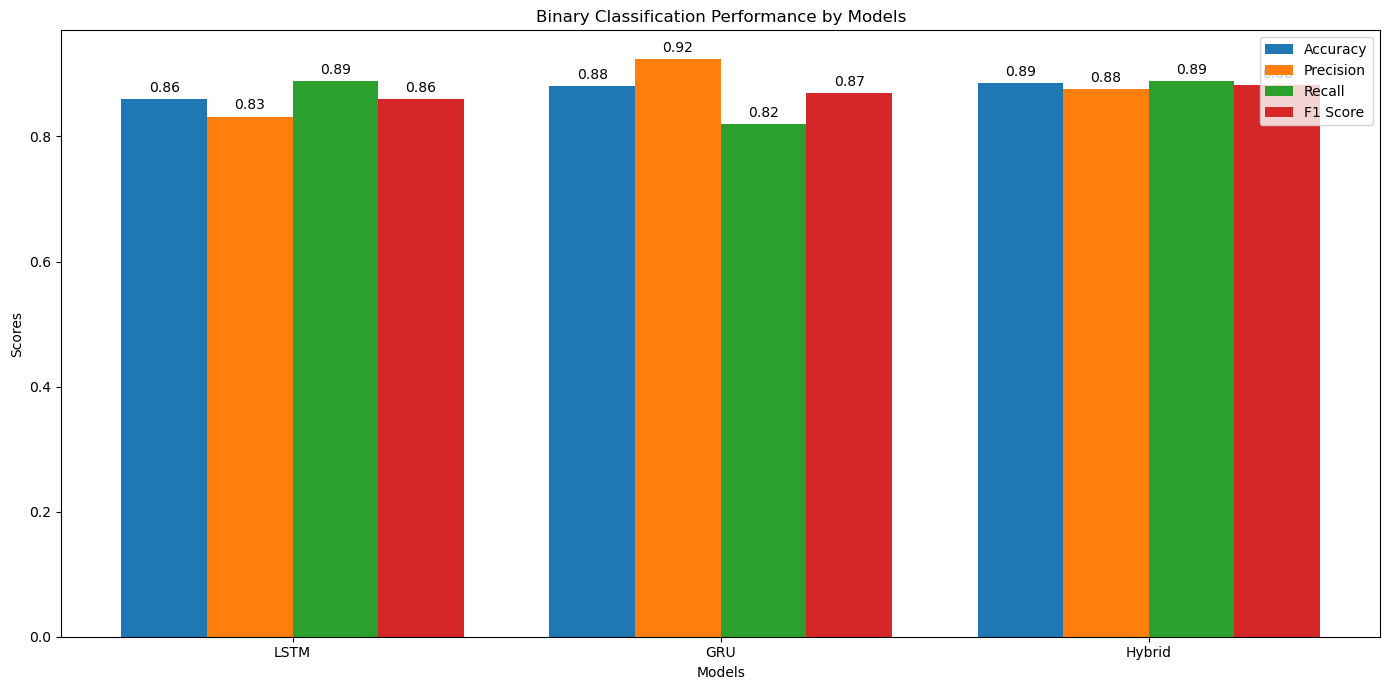

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate performance metrics for LSTM
lstm_accuracy = accuracy_score(y_test_binary, lstm_pred_binary)
lstm_precision = precision_score(y_test_binary, lstm_pred_binary)
lstm_recall = recall_score(y_test_binary, lstm_pred_binary)
lstm_f1 = f1_score(y_test_binary, lstm_pred_binary)

# Calculate performance metrics for GRU
gru_accuracy = accuracy_score(y_test_binary, gru_pred_binary)
gru_precision = precision_score(y_test_binary, gru_pred_binary)
gru_recall = recall_score(y_test_binary, gru_pred_binary)
gru_f1 = f1_score(y_test_binary, gru_pred_binary)

# Calculate performance metrics for Hybrid
hybrid_accuracy = accuracy_score(y_test_binary, hybrid_pred_binary)
hybrid_precision = precision_score(y_test_binary, hybrid_pred_binary)
hybrid_recall = recall_score(y_test_binary, hybrid_pred_binary)
hybrid_f1 = f1_score(y_test_binary, hybrid_pred_binary)

# Prepare data for plotting
models = ['LSTM', 'GRU', 'Hybrid']
accuracies = [lstm_accuracy, gru_accuracy, hybrid_accuracy]
precisions = [lstm_precision, gru_precision, hybrid_precision]
recalls = [lstm_recall, gru_recall, hybrid_recall]
f1_scores = [lstm_f1, gru_f1, hybrid_f1]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

rects1 = ax.bar(x - width * 1.5, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - width / 2, precisions, width, label='Precision')
rects3 = ax.bar(x + width / 2, recalls, width, label='Recall')
rects4 = ax.bar(x + width * 1.5, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Binary Classification Performance by Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


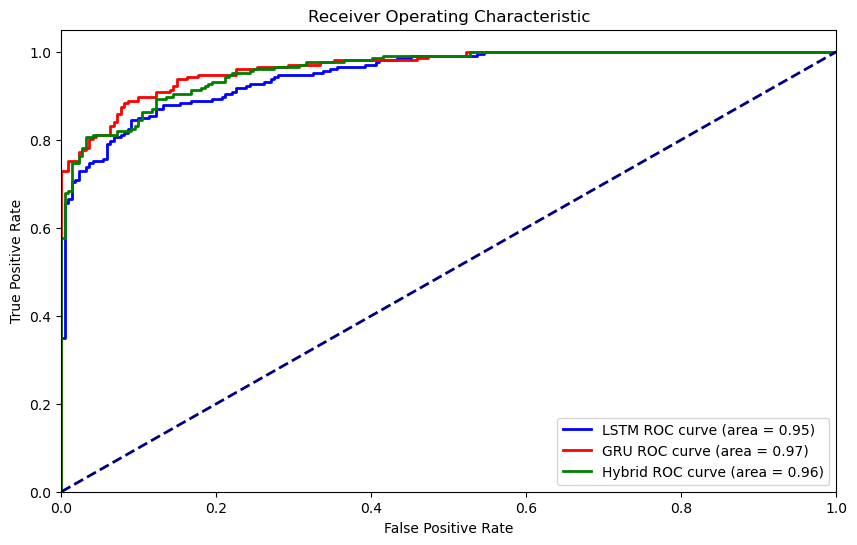

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for LSTM model
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_binary, lstm_predictions)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Calculate ROC curve and AUC for GRU model
fpr_gru, tpr_gru, _ = roc_curve(y_test_binary, gru_predictions)
roc_auc_gru = auc(fpr_gru, tpr_gru)

# Calculate ROC curve and AUC for Hybrid model
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test_binary, combined_test_predictions)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot ROC curves
plt.figure(figsize=(10, 6))

# Plot ROC curve for LSTM model
plt.plot(fpr_lstm, tpr_lstm, color='blue', lw=2, label='LSTM ROC curve (area = %0.2f)' % roc_auc_lstm)

# Plot ROC curve for GRU model
plt.plot(fpr_gru, tpr_gru, color='red', lw=2, label='GRU ROC curve (area = %0.2f)' % roc_auc_gru)

# Plot ROC curve for Hybrid model
plt.plot(fpr_hybrid, tpr_hybrid, color='green', lw=2, label='Hybrid ROC curve (area = %0.2f)' % roc_auc_hybrid)

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [80]:
# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Obtain predictions from LSTM model
lstm_pred = lstm_model.predict(X_test)

# Train GRU model
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Obtain predictions from GRU model
gru_pred = gru_model.predict(X_test)

# Train the hybrid model
hybrid_model.fit([X_train, X_train], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Obtain predictions from the hybrid model
hybrid_pred = hybrid_model.predict([X_test, X_test])

# Assuming you have already imported necessary libraries and defined models


Epoch 1/10
28/28 [==============================] - 0s 15ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 2/10
28/28 [==============================] - 1s 19ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 3/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 4/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 5/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 6/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 7/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 8/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 9/10
28/28 [==============================] - 0s 14ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 10/10
14/14 [==============================] - 0s 5ms/step
Epoch 1/10
28/28 [==========================

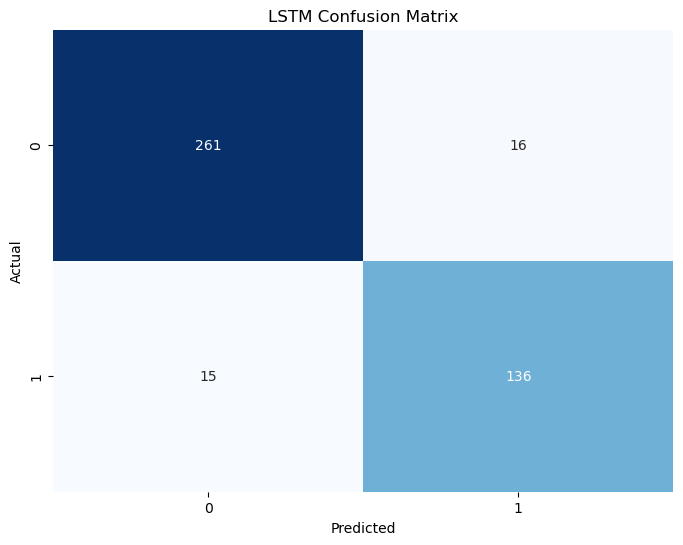

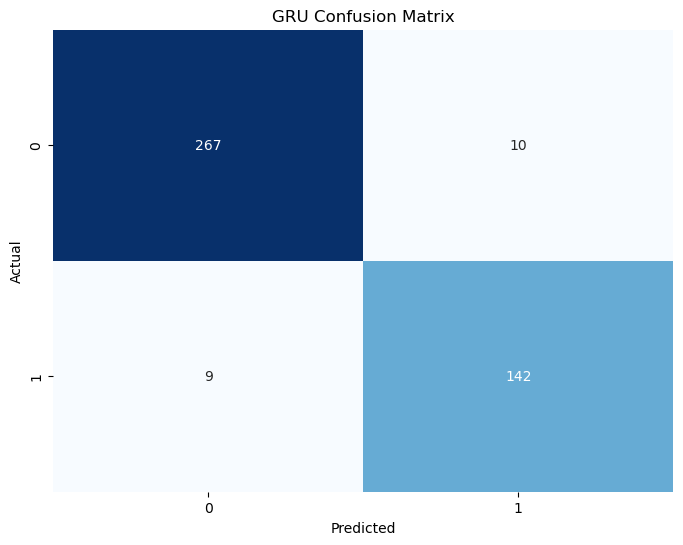

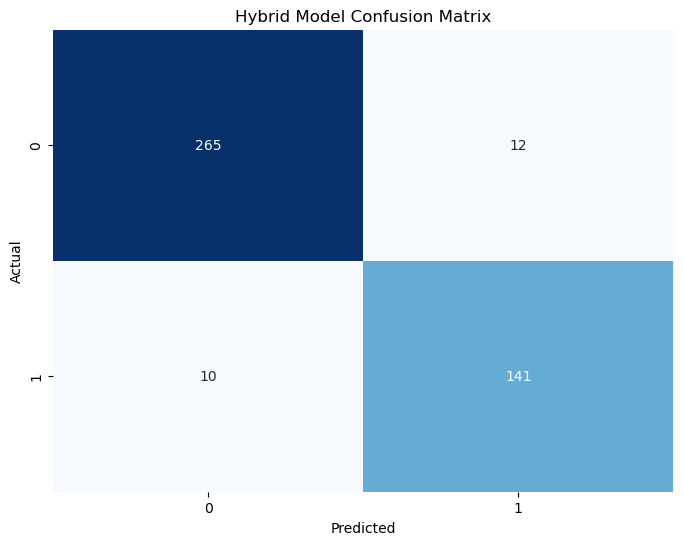

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example threshold for binary conversion
threshold = 0.5

# Generate binary predictions for y_test, lstm_pred, and gru_pred
y_test_binary = (y_test > threshold).astype(int)
lstm_pred_binary = (lstm_pred > threshold).astype(int)
gru_pred_binary = (gru_pred > threshold).astype(int)

# Create hybrid predictions by averaging LSTM and GRU predictions
hybrid_pred = (lstm_pred + gru_pred) / 2
hybrid_pred_binary = (hybrid_pred > threshold).astype(int)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrices
lstm_cm = confusion_matrix(y_test_binary, lstm_pred_binary)
gru_cm = confusion_matrix(y_test_binary, gru_pred_binary)
hybrid_cm = confusion_matrix(y_test_binary, hybrid_pred_binary)

# Plotting confusion matrices
plot_confusion_matrix(lstm_cm, "LSTM Confusion Matrix")
plot_confusion_matrix(gru_cm, "GRU Confusion Matrix")
plot_confusion_matrix(hybrid_cm, "Hybrid Model Confusion Matrix")


In [82]:
# Assuming lstm_predictions and gru_predictions are already defined from your models

# Example of combining predictions (you can adjust this based on your hybrid model approach)
hybrid_predictions = (lstm_predictions + gru_predictions) / 2

# Now calculate ROC curve and ROC AUC for the hybrid model
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test_binary, hybrid_predictions)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Print ROC AUC score for the hybrid model
print("Hybrid Model ROC AUC:", roc_auc_hybrid)


Hybrid Model ROC AUC: 0.9872570349295908
